In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [49]:
df = pd.read_csv(r'C:\Users\Neesty\Downloads\Elasticity_2024_01_30.csv')
df.head()

,sku,dates,price,qnt
0,10060,10/04/19,2798.0,3
1,10060,11/04/19,2798.0,2
2,10060,12/04/19,2798.0,4
3,10060,13/04/19,2798.0,3
4,10060,14/04/19,2798.0,1


In [50]:
df.qnt = np.log(df.qnt+1)

In [53]:
# model = LinearRegression()
r_squares = {}
for sku in df.sku.unique():
    df_for_one_sku = df.query(f'sku == {sku}')
    # print(df_for_one_sku)
    model = linregress(df_for_one_sku.price, df_for_one_sku.qnt)
    r_squares[sku] = model.rvalue**2

In [56]:
elasticity = pd.DataFrame(list(r_squares.items()), columns=['sku', 'elasticity'])

<Axes: ylabel='elasticity'>

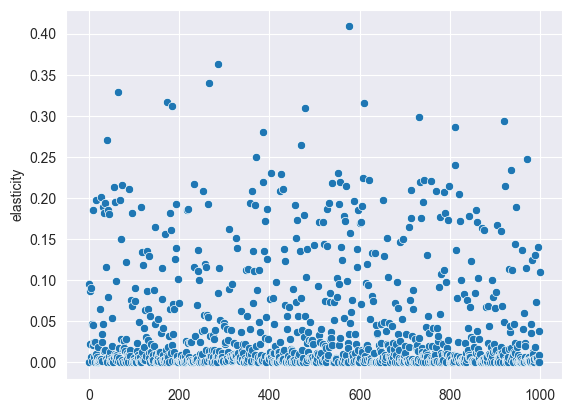

In [58]:
sns.scatterplot(elasticity.elasticity)

In [60]:
new_df = df.merge(elasticity)
new_df.head(7)

,sku,dates,price,qnt,elasticity
0,10060,10/04/19,2798.0,1.386294,0.095843
1,10060,11/04/19,2798.0,1.098612,0.095843
2,10060,12/04/19,2798.0,1.609438,0.095843
3,10060,13/04/19,2798.0,1.386294,0.095843
4,10060,14/04/19,2798.0,0.693147,0.095843
5,10060,15/04/19,2821.0,1.609438,0.095843
6,10060,16/04/19,2821.0,1.609438,0.095843


In [61]:
new_df["MR"] = new_df.price * (1 + 1/new_df.elasticity)

In [62]:
new_df

,sku,dates,price,qnt,elasticity,MR
0,10060,10/04/19,2798.0,1.386294,0.095843,31991.424962
1,10060,11/04/19,2798.0,1.098612,0.095843,31991.424962
2,10060,12/04/19,2798.0,1.609438,0.095843,31991.424962
3,10060,13/04/19,2798.0,1.386294,0.095843,31991.424962
4,10060,14/04/19,2798.0,0.693147,0.095843,31991.424962
...,...,...,...,...,...,...
318951,99996,26/11/19,813.0,1.791759,0.110405,8176.796357
318952,99996,27/11/19,813.0,1.791759,0.110405,8176.796357
318953,99996,28/11/19,813.0,2.079442,0.110405,8176.796357
318954,99996,29/11/19,813.0,1.791759,0.110405,8176.796357
